# 多项式回归

线性回归使用直线来拟合数据，多项式回归则使用各种复杂的曲线来拟合数据，数学本质是高阶多项式。

阶数越高，对数据拟合的效果可能越好，但是这可能发生过拟合，所以建议先通过可视化观察数据的分布，拟合之后观察拟合曲线和数据的相对位置，检查曲线是否因为离群点而改变了形状（这往往表示发生了过拟合），结合r方来评估拟合效果。

## 生成数据

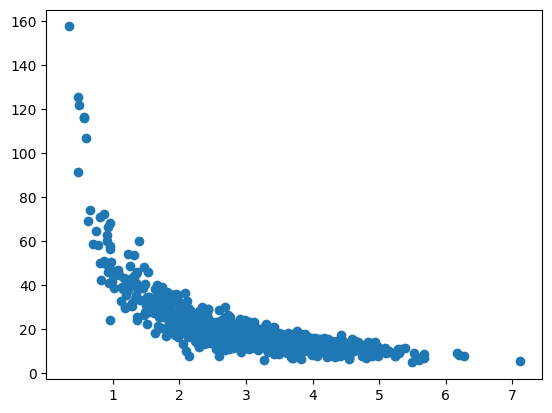

In [1]:
import numpy as np

"""生成模拟数据，通过图形观察数据分布
"""
from pylab import *  # 模块来自matplotlib
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
scatter(pageSpeeds, purchaseAmount)


np.random.seed这一行代码的意义：

创建一个随机数种子，这意味后面的随机操作都是确定的，可以确保每次运行这段代码时，都能得到同样的结果。

后面需要用不同的拟合来比较，基于相同的数据时非常重要的。

## 建模

In [2]:
"""训练 并 构造预测函数"""
my_model = np.polyfit(pageSpeeds, purchaseAmount, 4)
p4 = np.poly1d(my_model)  # 构造预测函数，poly1d表示自变量是1维的

print(p4)  # 打印预测函数

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


In [3]:
np.polyval(p = my_model, x= [1, 2])

array([56.19826457, 23.72133488])

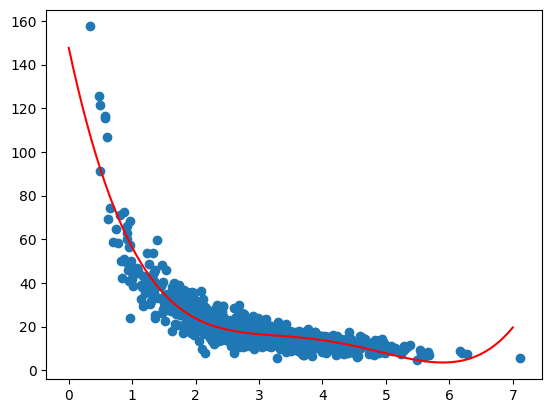

In [4]:
"""观察预测效果
"""
import matplotlib.pyplot as plt
xp = np.linspace(0, 7, 100)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(xp, p4(xp), c='r')
plt.show()


## 评估

通过可视化技术，我们已经大致用肉眼评估了拟合的可靠性。除此之外，我们还可以通过r方来定量评估：

In [5]:
"""计算r方误差，进一步量化评估拟合效果
"""
from sklearn.metrics import r2_score  # sklearn来自scikit-learn
r2 = r2_score(purchaseAmount, p4(pageSpeeds))
print(r2)


0.8293766396303073


# 探索

尝试使用不同的阶数，看看拟合的效果。

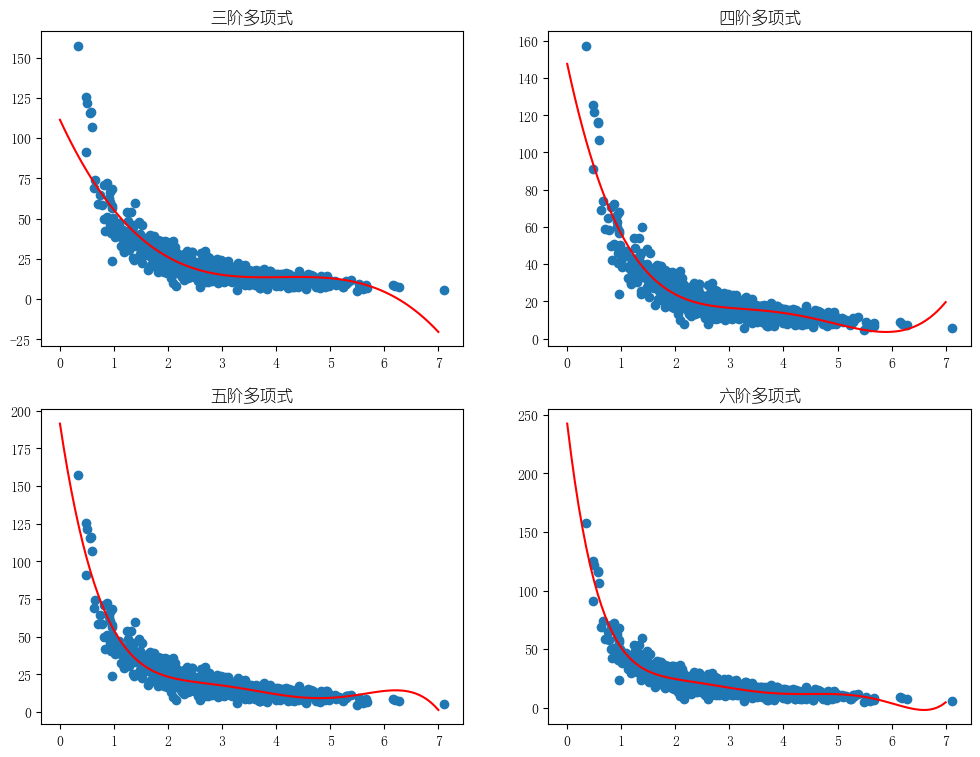

In [7]:
x = pageSpeeds
y = purchaseAmount

p3 = np.poly1d(np.polyfit(x, y, 3))
p5 = np.poly1d(np.polyfit(x, y, 5))
p6 = np.poly1d(np.polyfit(x, y, 6))

import matplotlib
matplotlib.rc("font",family='YouYuan')

plt.rcParams['axes.unicode_minus']=False # 否则会有报错：Glyph 8722 missing from current font.

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,9))

ax[0,0].scatter(x, y)
ax[0,0].plot(xp, p3(xp), c='r')
ax[0,0].set_title('三阶多项式')

ax[0,1].scatter(x, y)
ax[0,1].plot(xp, p4(xp), c='r')
ax[0,1].set_title('四阶多项式')

ax[1,0].scatter(x, y)
ax[1,0].plot(xp, p5(xp), c='r')
ax[1,0].set_title('五阶多项式')

ax[1,1].scatter(x, y)
ax[1,1].plot(xp, p6(xp), c='r')
ax[1,1].set_title('六阶多项式')

plt.show()